## Background

For this project, we are going to explore and analyse some of the most popular films that were released in 2021 and to do that, we will be using BeautifulSoup to extract the data from IMDB webpage. The titles were sorted by popularity ascending (from the most to the least popular). Note that the page contains 50 pages with 590,072 film titles but for the purpose of this project, we are only going to extract the first page of it. The page itself can accessed in [here](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31).

As you can see from the screenshot below, for every film title, several other informations such as the duration, genre, metascore rating and number of votes received were also provided. Later on, we will take four kinds of data from each film (title, IMDB score, metascore, total votes) and to have a quick analysis of our dataset. So, let's get straight to it!

!['imdb screenshot'](imdb.png)

Requesting the Data and Creating a BeautifulSoup. Let's begin with requesting the web from the site with `get` method.

### 1. Import and read file

In [1]:
import requests

url = requests.get("https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31")
url

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url.content[:500]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

### 2. Creating a BeautifulSoup object

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url.content,"html.parser")

Finding the right key to extract.

In [4]:
table = soup.find('div', attrs={'class':'lister list detail sub-list'})
print(table.prettify()[:500])

<div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt13668894">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt13668894/">
     <img alt="The Book of Boba Fett" class="loadlate" data-tconst="tt13668894" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZjllZjE1MWEtYTJhZC00MWIyLTliMjEtY


In [5]:
row = table.find_all('div', attrs={'class':'lister-item-content'})
row_length = len(row)
row_length

50

These are the keys for every informations that needed to be extracted from our `row` object.

In [42]:
# find title
table.find_all('a')

# find rating
table.find_all('strong')

# find metascore
table.find_all('div', attrs={'class':'inline-block ratings-metascore'})

# find votes
table.find_all('p', attrs={'class':'sort-num_votes-visible'})[:3]

[<p class="sort-num_votes-visible">
 <span class="text-muted">Votes:</span>
 <span data-value="85904" name="nv">85,904</span>
 </p>,
 <p class="sort-num_votes-visible">
 <span class="text-muted">Votes:</span>
 <span data-value="62285" name="nv">62,285</span>
 </p>,
 <p class="sort-num_votes-visible">
 <span class="text-muted">Votes:</span>
 <span data-value="113817" name="nv">113,817</span>
 </p>]

### 3. Extract the necessary informations

In [13]:
temp = [] #initiate a tuple

for i in row:
    
    title = i.find_all('a')
    title = title[0].text
    
    for rate in i.find_all('strong'):
        rating = rate.text
    
    for meta in i.find_all('div', attrs={'class':'inline-block ratings-metascore'}):
        metascore = meta.find_all('span')
        metascore = metascore[0].text.strip() # .strip() to remove all white spaces and \n from your list
    
    for number in i.find_all('p', attrs={'class':'sort-num_votes-visible'}):
        votes = number.find_all('span', attrs={'name':'nv'})
        votes = votes[0].text
    
    temp.append((title, rating, metascore, votes))

temp[:10]

[('The Book of Boba Fett', '7.5', '91', '85,904'),
 ('Nightmare Alley', '7.2', '70', '62,285'),
 ('The Power of the Dog', '6.9', '89', '113,817'),
 ("The King's Man", '6.4', '44', '59,590'),
 ('1883', '9.0', '44', '31,045'),
 ('Encanto', '7.3', '75', '147,388'),
 ('Spider-Man: No Way Home', '8.7', '71', '468,827'),
 ('House of Gucci', '6.7', '59', '75,658'),
 ("Don't Look Up", '7.2', '49', '437,339'),
 ('Licorice Pizza', '7.8', '90', '32,999')]

In [20]:
import pandas as pd

df = pd.DataFrame(temp)
df.head(10)

,0,1,2,3
0,The Book of Boba Fett,7.5,91,"85,904"
1,Nightmare Alley,7.2,70,"62,285"
2,The Power of the Dog,6.9,89,"113,817"
3,The King's Man,6.4,44,"59,590"
4,1883,9.0,44,"31,045"
5,Encanto,7.3,75,"147,388"
6,Spider-Man: No Way Home,8.7,71,"468,827"
7,House of Gucci,6.7,59,"75,658"
8,Don't Look Up,7.2,49,"437,339"
9,Licorice Pizza,7.8,90,"32,999"


In [21]:
df.shape

(50, 4)

We have a total of 50 films in our dataframe.

In [22]:
df = df.rename(columns={0:'title', 1:'imdb rating', 2:'metascore', 3:'votes'})
df.head(5)

,title,imdb rating,metascore,votes
0,The Book of Boba Fett,7.5,91,"85,904"
1,Nightmare Alley,7.2,70,"62,285"
2,The Power of the Dog,6.9,89,"113,817"
3,The King's Man,6.4,44,"59,590"
4,1883,9.0,44,"31,045"


Columns description:

- `title` = Title's name for every films released between 2021-01-01 and 2021-12-31

- `imdb rating` = (1-10) IMDb ratings that are based on the votes of the website's registered users. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page. Users can update their votes as often as they'd like, but any new vote on the same title will overwrite the previous one, so it is one vote per title per user.

- `metascore` = (0-100) A weighted average of many reviews coming from reputed critics. The Metacritic team reads the reviews and assigns each a 0–100 score, which is then given a weight, mainly based on the review's quality and source. Higher scores indicating better overall reviews.

- `votes` = Number of votes received by each films

How metascore rating system works:

!['metascore'](imdb_metascore2.png)

For more informations on how the rating system works on IMDB website, you can read the full FAQ here: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#

Full documentation on metascore and how the ratings works can be seen in this page: https://www.metacritic.com/about-metascores

In [23]:
df.dtypes

title          object
imdb rating    object
metascore      object
votes          object
dtype: object

In [24]:
df['imdb rating'] = df['imdb rating'].astype('float64')
df['metascore'] = df['metascore'].astype('int64')
df['votes'] = df['votes'].str.replace(',','').astype('int64')

df.dtypes

title           object
imdb rating    float64
metascore        int64
votes            int64
dtype: object

## EDA

In [25]:
df.describe()

,imdb rating,metascore,votes
count,50.000000,50.000000,50.000000
mean,7.418000,70.340000,108036.800000
std,0.725537,14.064879,128939.830275
min,5.500000,44.000000,6045.000000
25%,7.100000,62.000000,27542.000000
50%,7.300000,72.000000,51565.500000
75%,7.875000,82.000000,119926.750000
max,9.100000,91.000000,491260.000000


From the above summary of our dataframe, we're able to gain a few quick insights into the most popular films released between 2021-01-01 and 2021-12-31 such as:

1. Lowest IMDB rating is 5.5, while the highest rating is 9.1 and an average of 7.4 for all films
2. The average metascore from all films is 70 which is considered to be "good" films by the critics
3. 5886 is the lowest number of votes received by a film while the one with the most number of votes counted for 489,938 of a total reviews

In [26]:
# top 5 films with the most positive ratings on IMDB

imdb = df.groupby("title").sum()[['imdb rating','votes']].sort_values('imdb rating', ascending=False)
imdb.head()

,imdb rating,votes
title,,
Arcane: League of Legends,9.1,157809
1883,9.0,31045
Spider-Man: No Way Home,8.7,468827
Dopesick,8.7,38925
Dexter: New Blood,8.3,74073


In [27]:
meta = df.groupby("title").sum()[["metascore"]]

# top 10 films with the highest metascore
meta.sort_values('metascore', ascending=False).head(10)

,metascore
title,
Flugt,91
Superman & Lois,91
The Book of Boba Fett,91
Dopesick,91
Doraibu mai kâ,91
Verdens verste menneske,90
Licorice Pizza,90
The Power of the Dog,89
The Tragedy of Macbeth,87


**Question 1:** "Among those films, how many received a favourable or "good" rating from the critics?"

In [28]:
print(meta[meta["metascore"] > 60].shape[0])

38


38 out of 50 films scored above 60, which means that more than half of the films in our list received a "good" ratings from the critics.

**Question 2:** "Even though some films garnered a lot of attention from the public, there are some films that unfortunately didn't received a good reviews from the critics. From the 50 most popular films released this year, find out which films received unsatisfactory reviews from the critics"

In [29]:
meta[meta['metascore'] < 60].sort_values('metascore')

,metascore
title,
1883,44
The King's Man,44
Ghostbusters: Afterlife,45
Don't Look Up,49
Sing 2,49
Eternals,52
Yellowjackets,52
American Underdog,53
Munich: The Edge of War,53


**Question 3**: "Find out top 7 films that received the highest number of votes from IMDB registered users"

In [30]:
imdb.sort_values('votes', ascending=False).head(7)

,imdb rating,votes
title,,
Dune: Part One,8.1,491260
Spider-Man: No Way Home,8.7,468827
Don't Look Up,7.2,437339
Ojing-eo geim,8.0,400761
No Time to Die,7.3,315552
The Suicide Squad,7.2,304819
Free Guy,7.2,283320


<AxesSubplot:>

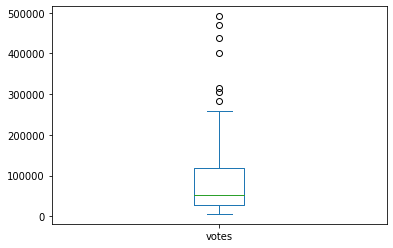

In [31]:
# to check the five number summary from our votes column
imdb['votes'].plot(kind='box')

In [32]:
#to check how many and which films that are considered to be outliers
print(imdb[imdb['votes'] > 200000].shape[0])
print(imdb[imdb['votes'] > 200000])

9
                         imdb rating   votes
title                                       
Spider-Man: No Way Home          8.7  468827
Dune: Part One                   8.1  491260
Ojing-eo geim                    8.0  400761
Nobody                           7.4  205697
No Time to Die                   7.3  315552
Don't Look Up                    7.2  437339
Free Guy                         7.2  283320
The Suicide Squad                7.2  304819
Eternals                         6.4  258137


There are 9 film outliers with total of votes more than 200,000.

Next, we'll check films that met the following conditions:

1. IMDB Rating of more than 7.0
2. Films with votes higher than 119,139 or 75% of our whole dataset
3. Metascore above 61 ("Generally Favourable Reviews")

In [33]:
df[(df['imdb rating'] >= 7.0) & (df['votes'] > 119139) & (df['metascore'] > 61)]

,title,imdb rating,metascore,votes
5,Encanto,7.3,75,147388
6,Spider-Man: No Way Home,8.7,71,468827
12,Dune: Part One,8.1,74,491260
19,The Last Duel,7.4,67,119954
28,Arcane: League of Legends,9.1,84,157809
30,No Time to Die,7.3,68,315552
38,The Suicide Squad,7.2,72,304819
40,Nobody,7.4,64,205697
43,Free Guy,7.2,62,283320
46,Ojing-eo geim,8.0,65,400761


There are 10 films that met with our conditions.

*Note: 'Ojing-eo geim' is the korean title for Squid Game, the extremely Netflix series that were released last year.*

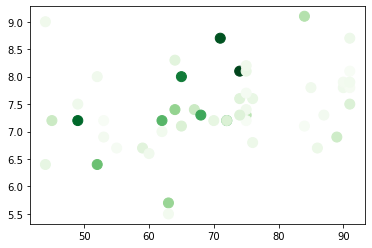

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df['metascore'], df['imdb rating'], s = 100, c = df['votes'], cmap = 'Greens')